In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
class Kmeans_families:
    def __init__(self , data):
        self.data = np.array(data)
        self.shape = data.shape
        self.X = self.data
    def fit(self , n_clusters , random_state=42):
        kmeans = KMeans(n_clusters= n_clusters , random_state=random_state)
        kmeans.fit(self.X)
        self.labels = kmeans.labels_
        self.centroids = kmeans.cluster_centers_
        self.inertia = kmeans.inertia_
    def plot_data(self):
        plt.scatter(self.transformed_data[: , 0 ] , self.transformed_data[: , 1] , c = self.labels)
        plt.scatter(self.centroids_pca[: , 0] ,self.centroids_pca[: , 1] , color='red' , marker='+')
        plt.show()
    def pca(self , components = 2):
        pc = PCA(n_components=components)
        self.transformed_data = pc.fit_transform(self.X)
        self.centroids_pca = pc.transform(self.centroids)
    

In [3]:
class DBSCAN_families:
    def __init__(self , data):
        self.data = np.array(data)
        self.shape = data.shape
        self.X = self.data
    def fit(self , min_samples , eps , random_state=42):
        db = DBSCAN(eps=eps , min_samples=min_samples)
        self.clusters = db.fit_predict(self.X)
    def plot_data(self):
        plt.scatter(self.transformed_data[: , 0 ] , self.transformed_data[: , 1] , c = self.clusters)
        # plt.scatter(self.centroids_pca[: , 0] ,self.centroids_pca[: , 1] , color='red' , marker='+')
        plt.show()
    def pca(self , components = 2):
        pc = PCA(n_components=components)
        self.transformed_data = pc.fit_transform(self.X)

In [8]:
df = pd.read_csv('data/clustering_data.csv')
df

,Unnamed: 0,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome,Rural
0,0,-0.025154,0.775825,-0.978670,-0.656218,1.187685,-0.596674,1.585545,0.294224,1.323337
1,1,-0.025154,0.775825,-0.978670,-0.656218,-0.349396,-0.293301,0.193085,-0.835206,1.323337
2,2,-0.025154,0.775825,-0.978670,-0.656218,0.614651,-0.596674,0.193085,-0.210215,1.323337
3,3,-0.025154,0.775825,-0.978670,0.736282,-0.349396,-0.596674,1.585545,-0.090756,1.323337
4,4,-0.025154,0.775825,-0.978670,0.616332,-0.349396,-0.596674,2.281775,-0.145055,1.323337
...,...,...,...,...,...,...,...,...,...,...
151819,18379,-0.025154,0.095465,-0.138002,0.404224,-0.349396,-0.468406,-0.481728,-0.288982,1.323337
151820,18380,-0.025154,0.095465,-0.138002,-0.656218,0.589457,-0.487196,-0.481506,-0.193373,1.323337
151821,18381,-0.025154,0.095465,-0.138002,-0.656218,0.432981,-0.537109,-0.977178,-0.360198,1.323337
151822,18382,-0.025154,0.095465,1.543335,-0.656218,0.761580,-0.546320,-0.189386,-0.075998,1.323337


In [10]:
df = df.drop(columns='Unnamed: 0')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151824 entries, 0 to 151823
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   khanevartype     151824 non-null  float64
 1   province         151824 non-null  float64
 2   town             151824 non-null  float64
 3   Hoghugh_Income   151759 non-null  float64
 4   Azad_Income      151759 non-null  float64
 5   Other_Income     151759 non-null  float64
 6   Yarane_Income    151759 non-null  float64
 7   total_netincome  151759 non-null  float64
 8   Rural            151824 non-null  float64
dtypes: float64(9)
memory usage: 10.4 MB


In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151759 entries, 0 to 151823
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   khanevartype     151759 non-null  float64
 1   province         151759 non-null  float64
 2   town             151759 non-null  float64
 3   Hoghugh_Income   151759 non-null  float64
 4   Azad_Income      151759 non-null  float64
 5   Other_Income     151759 non-null  float64
 6   Yarane_Income    151759 non-null  float64
 7   total_netincome  151759 non-null  float64
 8   Rural            151759 non-null  float64
dtypes: float64(9)
memory usage: 11.6 MB


In [13]:
df.describe()

,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome,Rural
count,151759.000000,151759.000000,151759.000000,1.517590e+05,1.517590e+05,1.517590e+05,1.517590e+05,1.517590e+05,151759.000000
mean,0.000011,-0.000191,0.000044,9.439006e-17,-6.358220e-17,-2.322295e-17,-3.416021e-16,2.509577e-16,0.000159
std,1.000214,0.999924,1.000006,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000045
min,-0.025154,-1.718828,-0.978670,-6.562181e-01,-4.214398e+01,-5.966742e-01,-1.199376e+00,-3.479504e+01,-0.755660
25%,-0.025154,-0.811681,-0.810536,-6.562181e-01,-3.493956e-01,-5.385578e-01,-7.678131e-01,-5.405270e-01,-0.755660
50%,-0.025154,-0.017928,-0.306135,-6.562181e-01,-3.493956e-01,-4.297818e-01,-1.474421e-01,-1.776036e-01,-0.755660
75%,-0.025154,0.889219,0.366399,4.749376e-01,5.803847e-02,6.265572e-02,3.888135e-01,2.918627e-01,1.323337
max,39.755372,1.682972,5.410409,2.888029e+01,8.811028e+01,3.467925e+01,1.272523e+01,7.069564e+01,1.323337


In [14]:
df.head()

,khanevartype,province,town,Hoghugh_Income,Azad_Income,Other_Income,Yarane_Income,total_netincome,Rural
0,-0.025154,0.775825,-0.97867,-0.656218,1.187685,-0.596674,1.585545,0.294224,1.323337
1,-0.025154,0.775825,-0.97867,-0.656218,-0.349396,-0.293301,0.193085,-0.835206,1.323337
2,-0.025154,0.775825,-0.97867,-0.656218,0.614651,-0.596674,0.193085,-0.210215,1.323337
3,-0.025154,0.775825,-0.97867,0.736282,-0.349396,-0.596674,1.585545,-0.090756,1.323337
4,-0.025154,0.775825,-0.97867,0.616332,-0.349396,-0.596674,2.281775,-0.145055,1.323337


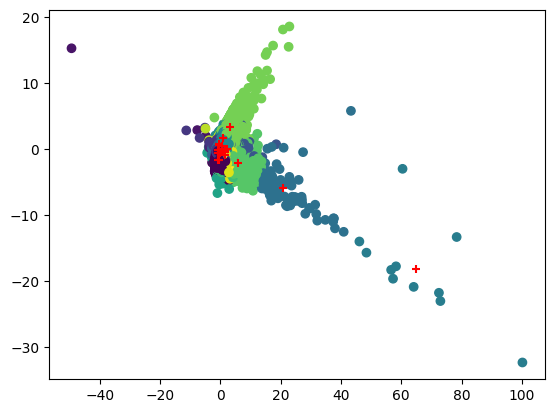

In [15]:
inertias = []
for i in range(2 , 21):
    kmeans = Kmeans_families(df)
    kmeans.fit(n_clusters=i)
    inertias.append(kmeans.inertia)
inertias
kmeans.pca(2)
kmeans.transformed_data.shape
kmeans.plot_data()

In [16]:
kmeans.labels

array([11,  3,  3, ...,  3,  0,  0])

In [17]:
kmeans.centroids

array([[-2.51536677e-02, -1.19021000e-01,  2.39623114e+00,
        -9.95160796e-02, -1.23932299e-02, -2.18416541e-01,
        -9.05297608e-02, -1.87014248e-01,  1.32333696e+00],
       [-2.51536677e-02, -7.70728082e-01, -2.50473369e-01,
        -4.98797115e-01, -2.08199324e-01, -1.84837625e-02,
        -6.73783031e-01, -5.06162658e-01, -7.55511095e-01],
       [-2.51536677e-02, -6.84653419e-01, -1.89011656e-01,
        -2.86827364e-01, -4.92127048e-02, -3.70494763e-01,
         5.55470442e-01, -3.92826302e-01, -7.55660459e-01],
       [-2.51536677e-02,  9.21290426e-01, -2.66141974e-01,
        -2.62565944e-01, -1.38211984e-01, -1.65769648e-01,
        -4.37783089e-01, -3.72622015e-01,  1.32333696e+00],
       [ 3.97553718e+01, -4.74574699e-02, -7.67030114e-02,
         1.01119910e+00,  1.05491439e-01, -2.54033550e-01,
        -2.78543973e-01,  5.71856601e-01, -4.10050965e-02],
       [-2.51536677e-02,  3.11573819e-02, -1.90975364e-01,
         3.79069855e+00, -2.26666521e-01, -1.664182

In [20]:
inertias

[1207496.2349152262,
 1132434.1171800643,
 1033333.3617756015,
 948632.5542343638,
 797465.2760776088,
 720244.941623517,
 695683.596077897,
 620747.0770996097,
 571206.4493480355,
 552807.4318859361,
 526635.6136236719,
 510788.4042695266,
 492835.57402777,
 471114.11488091596,
 453639.9606490382,
 439073.85636235634,
 431351.7737288048,
 419924.38606566645,
 413227.3864650716]

In [22]:
db = DBSCAN_families(df)
db.fit(min_samples=1000 , eps =2)
db.pca(2) 
db.plot_data()

MemoryError: 

In [57]:
np.unique(db.clusters).shape

(4,)